# Kunskapskontroll

### Fyll i uppgifterna nedan innan du lämnar in på LearnPoint: 
Namn på samtliga gruppmedlemmar: 

# Code

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Below, set your own path where you have stored the data file. 
housing = pd.read_csv(r'C:\Users\pauls\repos\Python\ai_del_1\kunskapskontroll_ai2_del1\housing.csv')

In [9]:
# Visa grundläggande information om datasetet
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## EDA

In [10]:
# Visa en statistisk sammanfattning av datasetet
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


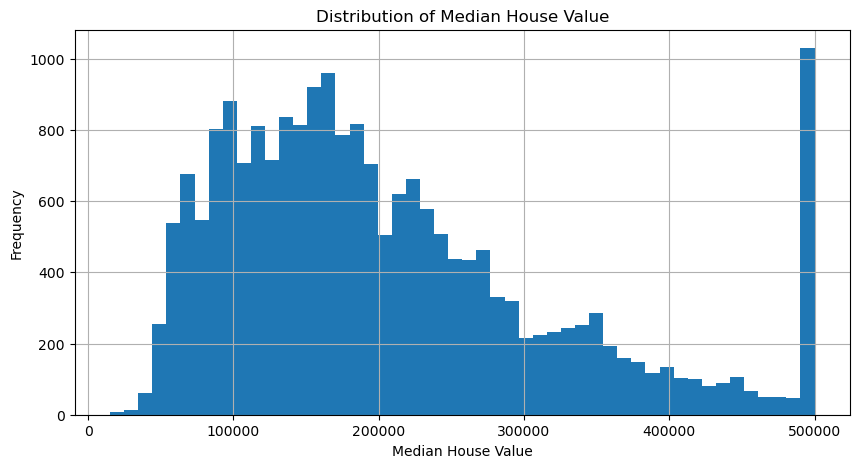

In [25]:
import matplotlib.pyplot as plt

# Plotta distributionen av median_house_value
housing['median_house_value'].hist(bins=50, figsize=(10,5))
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()


In [12]:
# Kontrollera vilka kolumner som har saknade värden
housing.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
# Fyll saknade värden med medianvärdet
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)


In [14]:
# Omvandla kategoriska variabler till numeriska
housing = pd.get_dummies(housing, columns=['ocean_proximity'])


In [15]:
# Skapa nya attribut
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

# Kontrollera de nya attributen
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False,6.281853,0.172096,2.181467


In [16]:
from sklearn.model_selection import train_test_split

# Definiera features och target variabler
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

# Dela upp data i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression

# Skapa och träna modellen
model = LinearRegression()
model.fit(X_train, y_train)

# Gör förutsägelser på testdatat
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')


MAE: 50888.66001571995
MSE: 5280716470.093979
R²: 0.597017682435079


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Skapa och träna en Random Forest modell
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Gör förutsägelser och utvärdera prestanda
rf_y_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mae, rf_mse, rf_r2


(32311.341022286822, 2538038306.4144573, 0.8063170850812138)

In [20]:
# Undersök hur många hus som har priset 500001
capped_houses = housing[housing['median_house_value'] == 500001]
num_capped_houses = len(capped_houses)
total_houses = len(housing)

print(f"Antal hus med priset 500001: {num_capped_houses}")
print(f"Andel av totala datasetet: {num_capped_houses / total_houses * 100:.2f}%")


Antal hus med priset 500001: 965
Andel av totala datasetet: 4.68%


In [21]:
# Lägg till en binär variabel som indikerar om priset är begränsat
housing['capped'] = (housing['median_house_value'] == 500001).astype(int)

# Uppdatera features och target variabler
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

# Dela upp data i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Träna om modellen med den nya variabeln
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Utvärdera den nya modellens prestanda
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mae, rf_mse, rf_r2


(28646.02514292636, 1885404922.1922386, 0.8561208787867727)

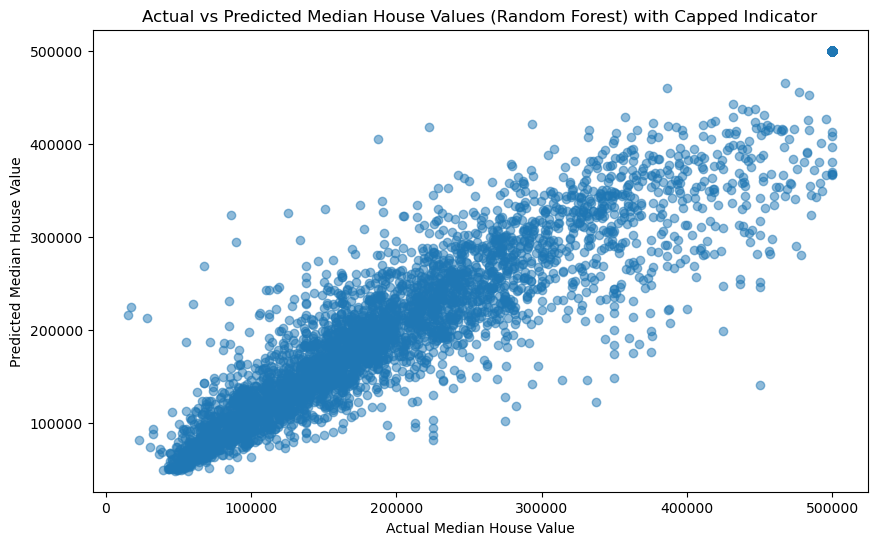

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Values (Random Forest) with Capped Indicator')
plt.show()


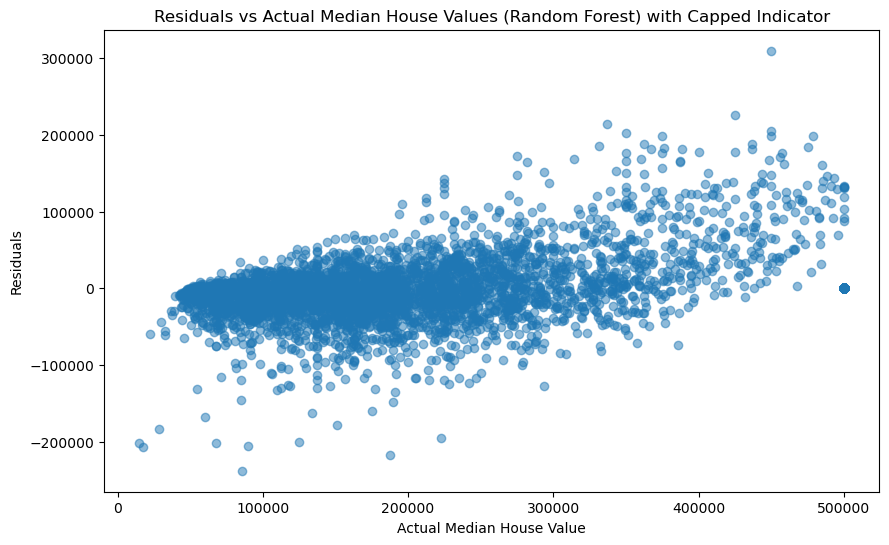

In [24]:
residuals = y_test - rf_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Median House Values (Random Forest) with Capped Indicator')
plt.show()
